# Momento de retroalimentación - Construcción de un modelo estadístico base

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

*   ¿Qué variables son significativas para predecir el precio de un automóvil?
*   ¿Qué tan bien describen esas variables el precio de un automóvil?

Con base en varias encuestas de mercado, la consultora ha recopilado un gran conjunto de datos de diferentes tipos de automóviles en el mercado estadounidense que presenta en el siguiente archivo Download archivo. Las variables recopiladas vienen descritas en el diccionario de términos Download diccionario de términos.

#### **Metadata del dataset**

| Variable | Definición | Clave |
|--------------|--------------|--------------|
| Symboling    | Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.    |   |
| CarName    | Name of car company (Categorical) |   |
| fueltype    | Car fuel type i.e gas or diesel (Categorical)  |     |
| carbody    | body of car (Categorical)  |     |
| drivewheel    | type of drive wheel (Categorical)  |    |
| enginelocation    | Location of car engine (Categorical) |     |
| wheelbase    |Weelbase of car (Numeric)  |     |
| carlength    | Length of car (Numeric) |     |
| carwidth    | Width of car (Numeric) |     |
| carheight    | height of car (Numeric) |  |
| curbweight    | The weight of a car without occupants or baggage. (Numeric)  |     |
| enginetype    | Type of engine. (Categorical) |     |
| cylindernumber    | cylinder placed in the car (Categorical)  |     |
| enginesize    | Size of car (Numeric)  |     |
| stroke    | Stroke or volume inside the engine (Numeric)  |     |
| compressionratio    | compression ratio of car (Numeric)  |     |
| horsepower    | Horsepower (Numeric)  |     |
| peakrpm    | car peak rpm (Numeric)  |     |
| citympg    | Mileage in city (Numeric) |     |
| highwaympg    | Mileage on highway (Numeric) |     |
| price(Dependent variable)    | Price of car (Numeric) |     |

## Librerías

Importar las librerías y conectar con el directorio de Google Drive.

In [502]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importar la base de datos de Drive

In [503]:
""" from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path """

' from google.colab import drive\n\ndrive.mount("/content/gdrive")\n!pwd  # show current path '

In [504]:
""" %cd "/content/gdrive/MyDrive/7mo Semestre/Reto"
!ls  # show current directory """

' %cd "/content/gdrive/MyDrive/7mo Semestre/Reto"\n!ls  # show current directory '

## Importar CVS local

In [505]:
data_base = pd.read_csv("precios_autos.csv")
data_base

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohc,four,141,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,sedan,rwd,front,109.1,188.8,68.8,55.5,...,ohc,four,141,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohcv,six,173,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,sedan,rwd,front,109.1,188.8,68.9,55.5,...,ohc,six,145,3.40,23.0,106,4800,26,27,22470.0


## Preprocesamiento de los datos

Se estandarizan las variables, ya que se identificó existen los valores de la característica _carname_ están mal escritos.

In [506]:
for i in range(len(data_base)):
    for j in range(len(data_base['CarName'][i])):
        if data_base['CarName'][i][j] == ' ':
            data_base['CarName'][i] = data_base['CarName'][i][:j]
            break
    #replace names
    if data_base['CarName'][i] == 'maxda':
        data_base['CarName'][i].replace('maxda','mazda')
    elif data_base['CarName'][i] == 'porcshce':
        data_base['CarName'][i] = 'porsche'
    elif data_base['CarName'][i] == 'toyouta':
        data_base['CarName'][i] = 'toyota'
    elif data_base['CarName'][i] == 'vw':
        data_base['CarName'][i] = 'volkswagen'
    elif data_base['CarName'][i] == 'vokswagen':
        data_base['CarName'][i] = 'volkswagen'
    elif data_base['CarName'][i] == 'Nissan':
        data_base['CarName'][i] = 'nissan'

C:\Users\frida\AppData\Local\Temp\ipykernel_14884\1529729630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base['CarName'][i] = data_base['CarName'][i][:j]
C:\Users\frida\AppData\Local\Temp\ipykernel_14884\1529729630.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base['CarName'][i] = 'nissan'
C:\Users\frida\AppData\Local\Temp\ipykernel_14884\1529729630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_base

## Exploración y preparación de la base de datos

### 1.- Exploración de la base de datos

##### Calculo de las métricas estadísticas apropiadas para las variables cuantitativas

In [507]:
# Se obtienen variables cuantitativas y cualitativas
cual_var = ['symboling','CarName','fueltype','carbody','drivewheel','enginelocation','enginetype','cylindernumber']
caunt_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
#caunt_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_cuantitativo = data_base[caunt_var]
df_cualitatitvo = data_base[cual_var]

In [508]:
# Se obtiene información de las variables cuantitativas
df_cuantitativo.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


### 2.- Explora los datos usando herramientas de visualización

#### Variables cuantitativas

##### Medidas de posición, cuartiles, outliers, boxplots

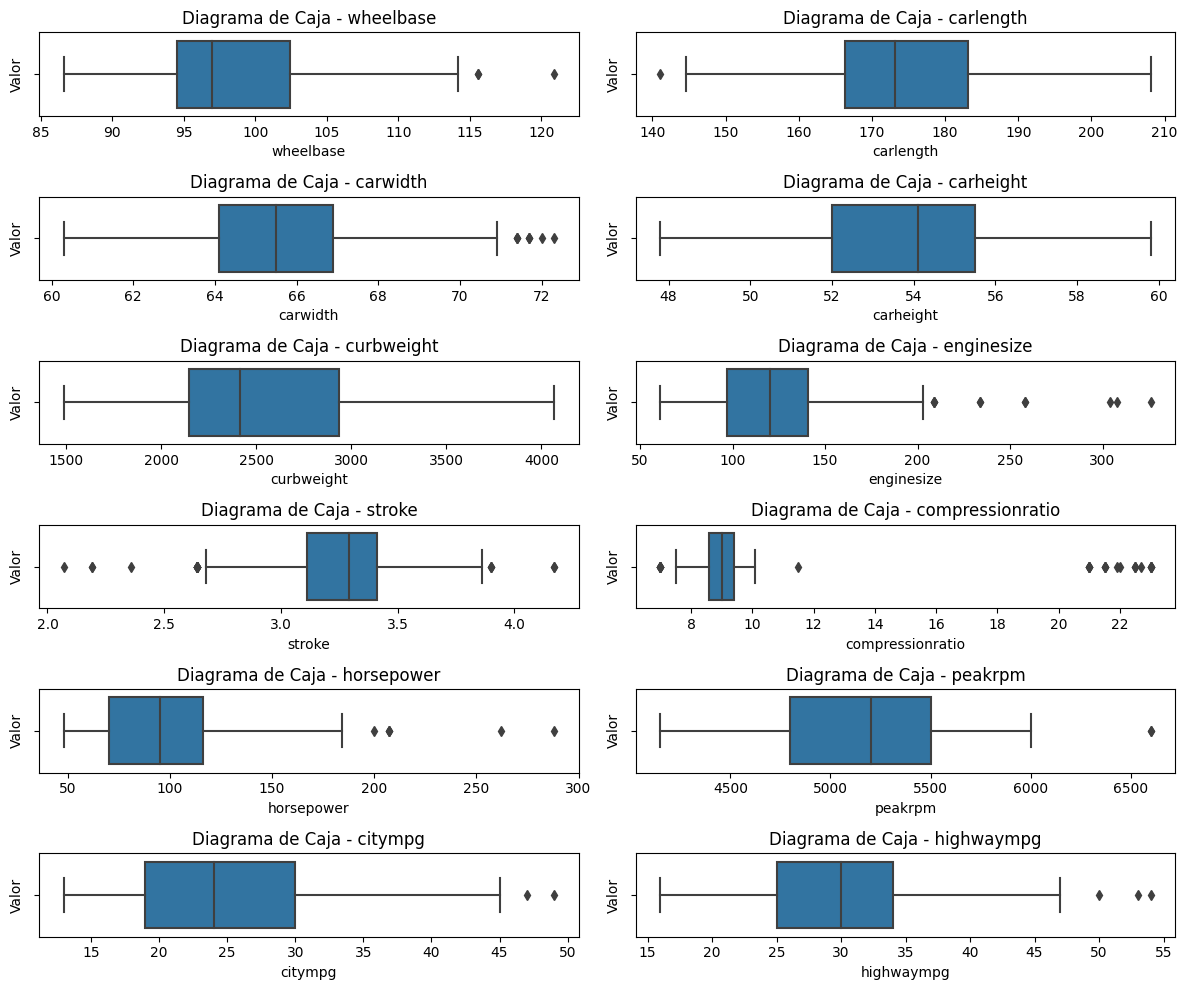

In [509]:
# Calcular el número de filas y columnas necesarias para los subplots
num_filas = len(caunt_var) // 2 + len(caunt_var) % 2  # División entera + 1 si hay un número impar de variables
num_columnas = 2  # 2 columnas en cada fila

# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 10))

# Asegurar de que caunt_var tenga al menos el mismo número de elementos que subplots
caunt_var.extend([''] * (num_filas * num_columnas - len(caunt_var)))

# Recorrer las variables y crea los diagramas de caja en los subplots
for i, variable in enumerate(caunt_var):
    fila = i // num_columnas    # Fila en la matriz de subplots
    columna = i % num_columnas  # Columna en la matriz de subplots

    if variable:
        sb.boxplot(x=variable, data=df_cuantitativo, ax=axs[fila, columna])
        axs[fila, columna].set_xlabel(variable)
        axs[fila, columna].set_ylabel('Valor')
        axs[fila, columna].set_title(f'Diagrama de Caja - {variable}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

##### Análisis de distribución de los datos

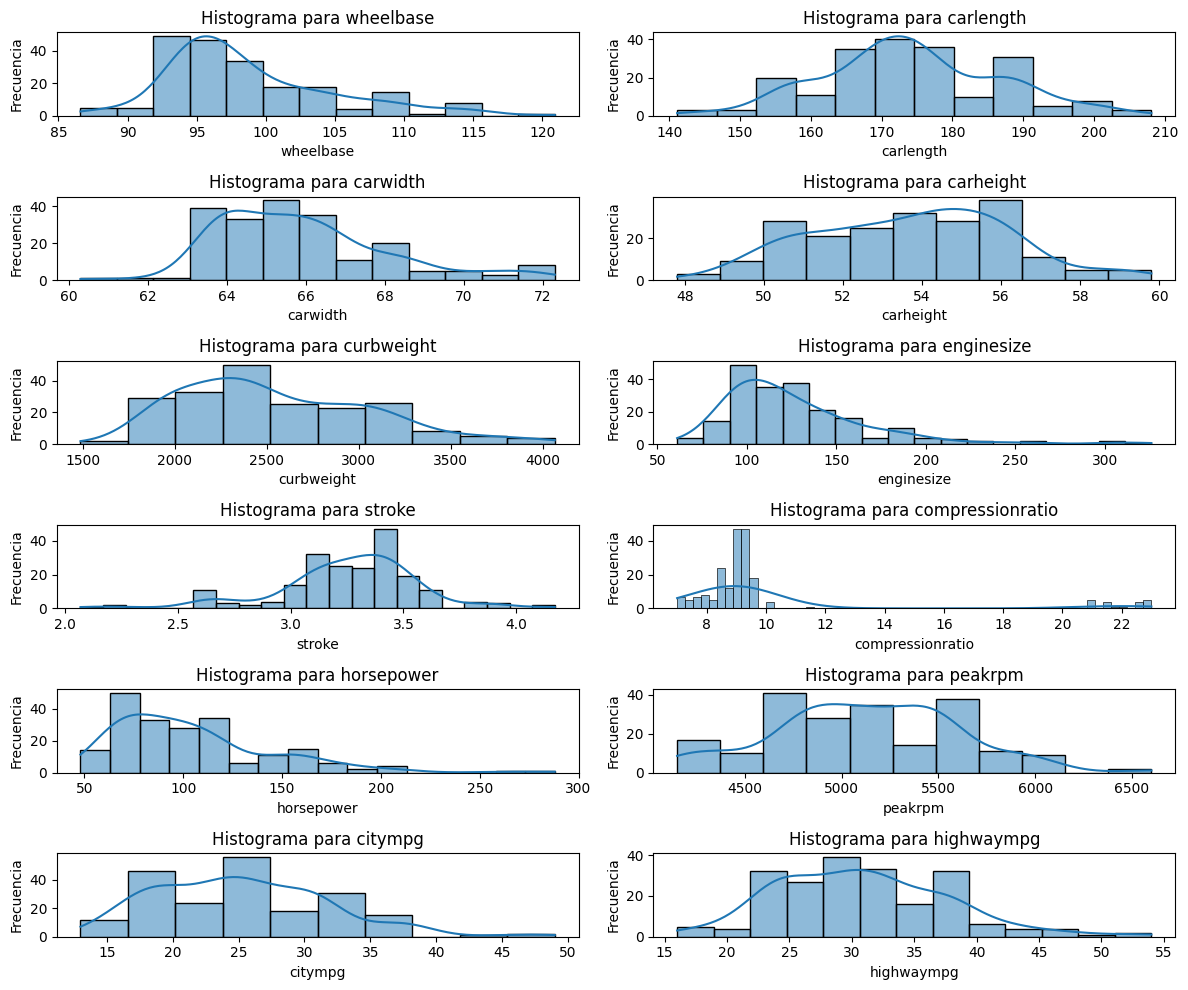

In [510]:
# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 10))

# Asegurar de que caunt_var tenga al menos el mismo número de elementos que subplots
caunt_var.extend([''] * (num_filas * num_columnas - len(caunt_var)))

# Recorrer las variables y crea los histogramas en los subplots
for i, variable in enumerate(caunt_var):
    fila = i // num_columnas  # Fila en la matriz de subplots
    columna = i % num_columnas  # Columna en la matriz de subplots

    if variable:
        sb.histplot(data=df_cuantitativo, x=variable, ax=axs[fila, columna], kde=True)
        axs[fila, columna].set_xlabel(variable)
        axs[fila, columna].set_ylabel('Frecuencia')
        axs[fila, columna].set_title(f'Histograma para {variable}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

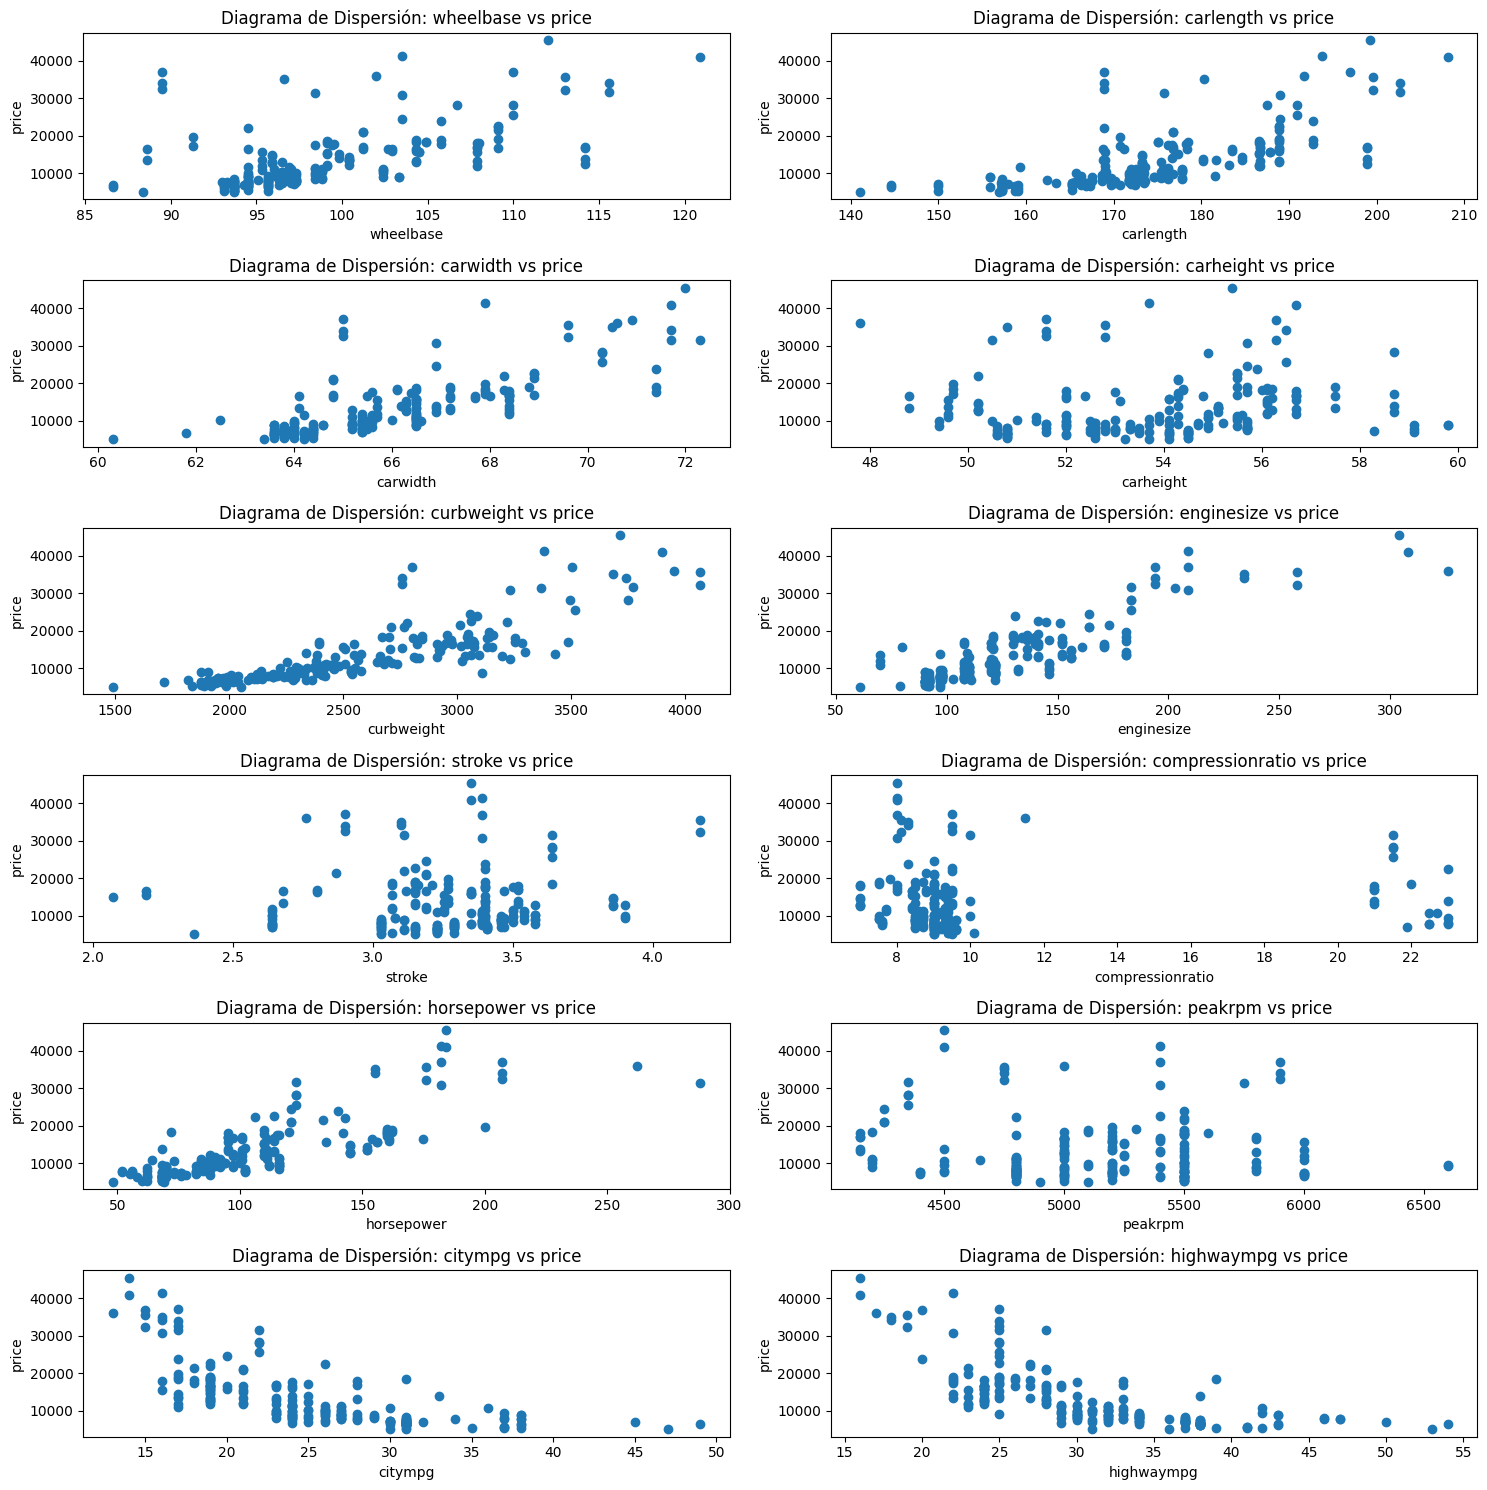

In [511]:
# Calcula el número de filas y columnas necesarias para los subplots
num_filas = len(caunt_var) // 2 + len(caunt_var) % 2  # División entera + 1 si hay un número impar de variables
num_columnas = 2  # 2 columnas en cada fila

# Crea una figura y una matriz de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 15))

# Asegúrate de que caunt_var tenga al menos el mismo número de elementos que subplots
caunt_var.extend([''] * (num_filas * num_columnas - len(caunt_var)))

# Recorre las variables y crea los gráficos de dispersión en subplots
for i, variable in enumerate(caunt_var):
    fila = i // num_columnas  # Fila en la matriz de subplots
    columna = i % num_columnas  # Columna en la matriz de subplots

    if variable:
        axs[fila, columna].scatter(df_cuantitativo[variable], data_base['price'])
        axs[fila, columna].set_xlabel(variable)
        axs[fila, columna].set_ylabel('price')
        axs[fila, columna].set_title(f'Diagrama de Dispersión: {variable} vs price')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra la figura
plt.show()

##### Análisis de colinealidad

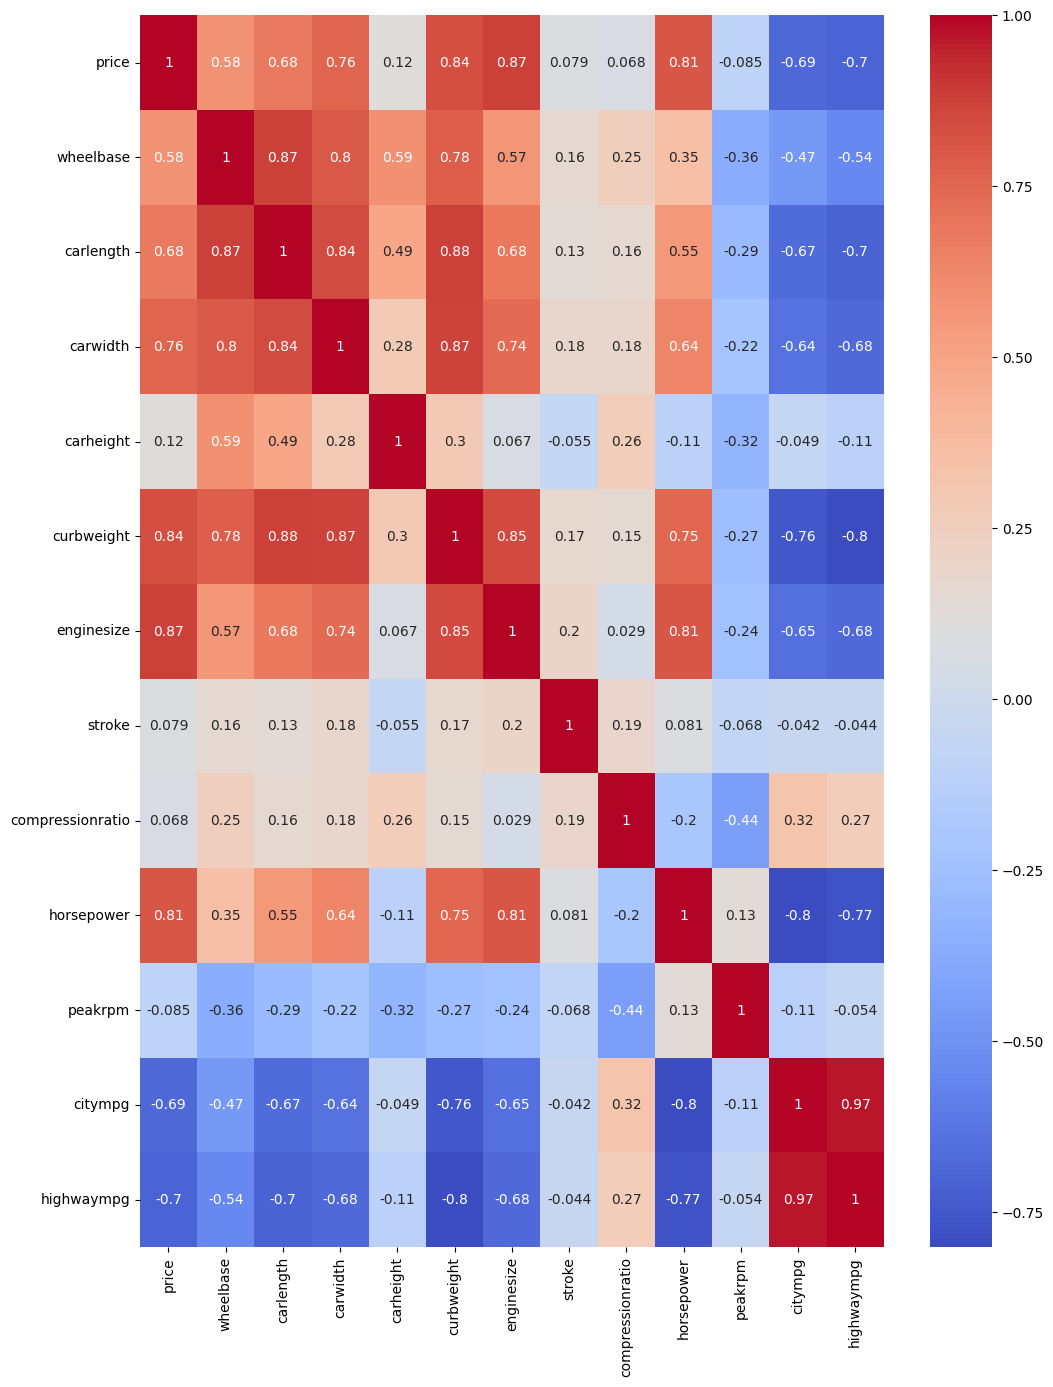

In [512]:
# Calcula la matriz de correlación entre las variables cuantitativas y 'price'
caunt_var_precio = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
df_cuantitativo_precio = data_base[caunt_var_precio]
correlation_matrix = df_cuantitativo_precio.corr()

# Puedes visualizar la matriz de correlación si lo deseas
#print(correlation_matrix)

plt.figure(figsize=(12, 16))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Variables categóricas

##### Distribución de los datos

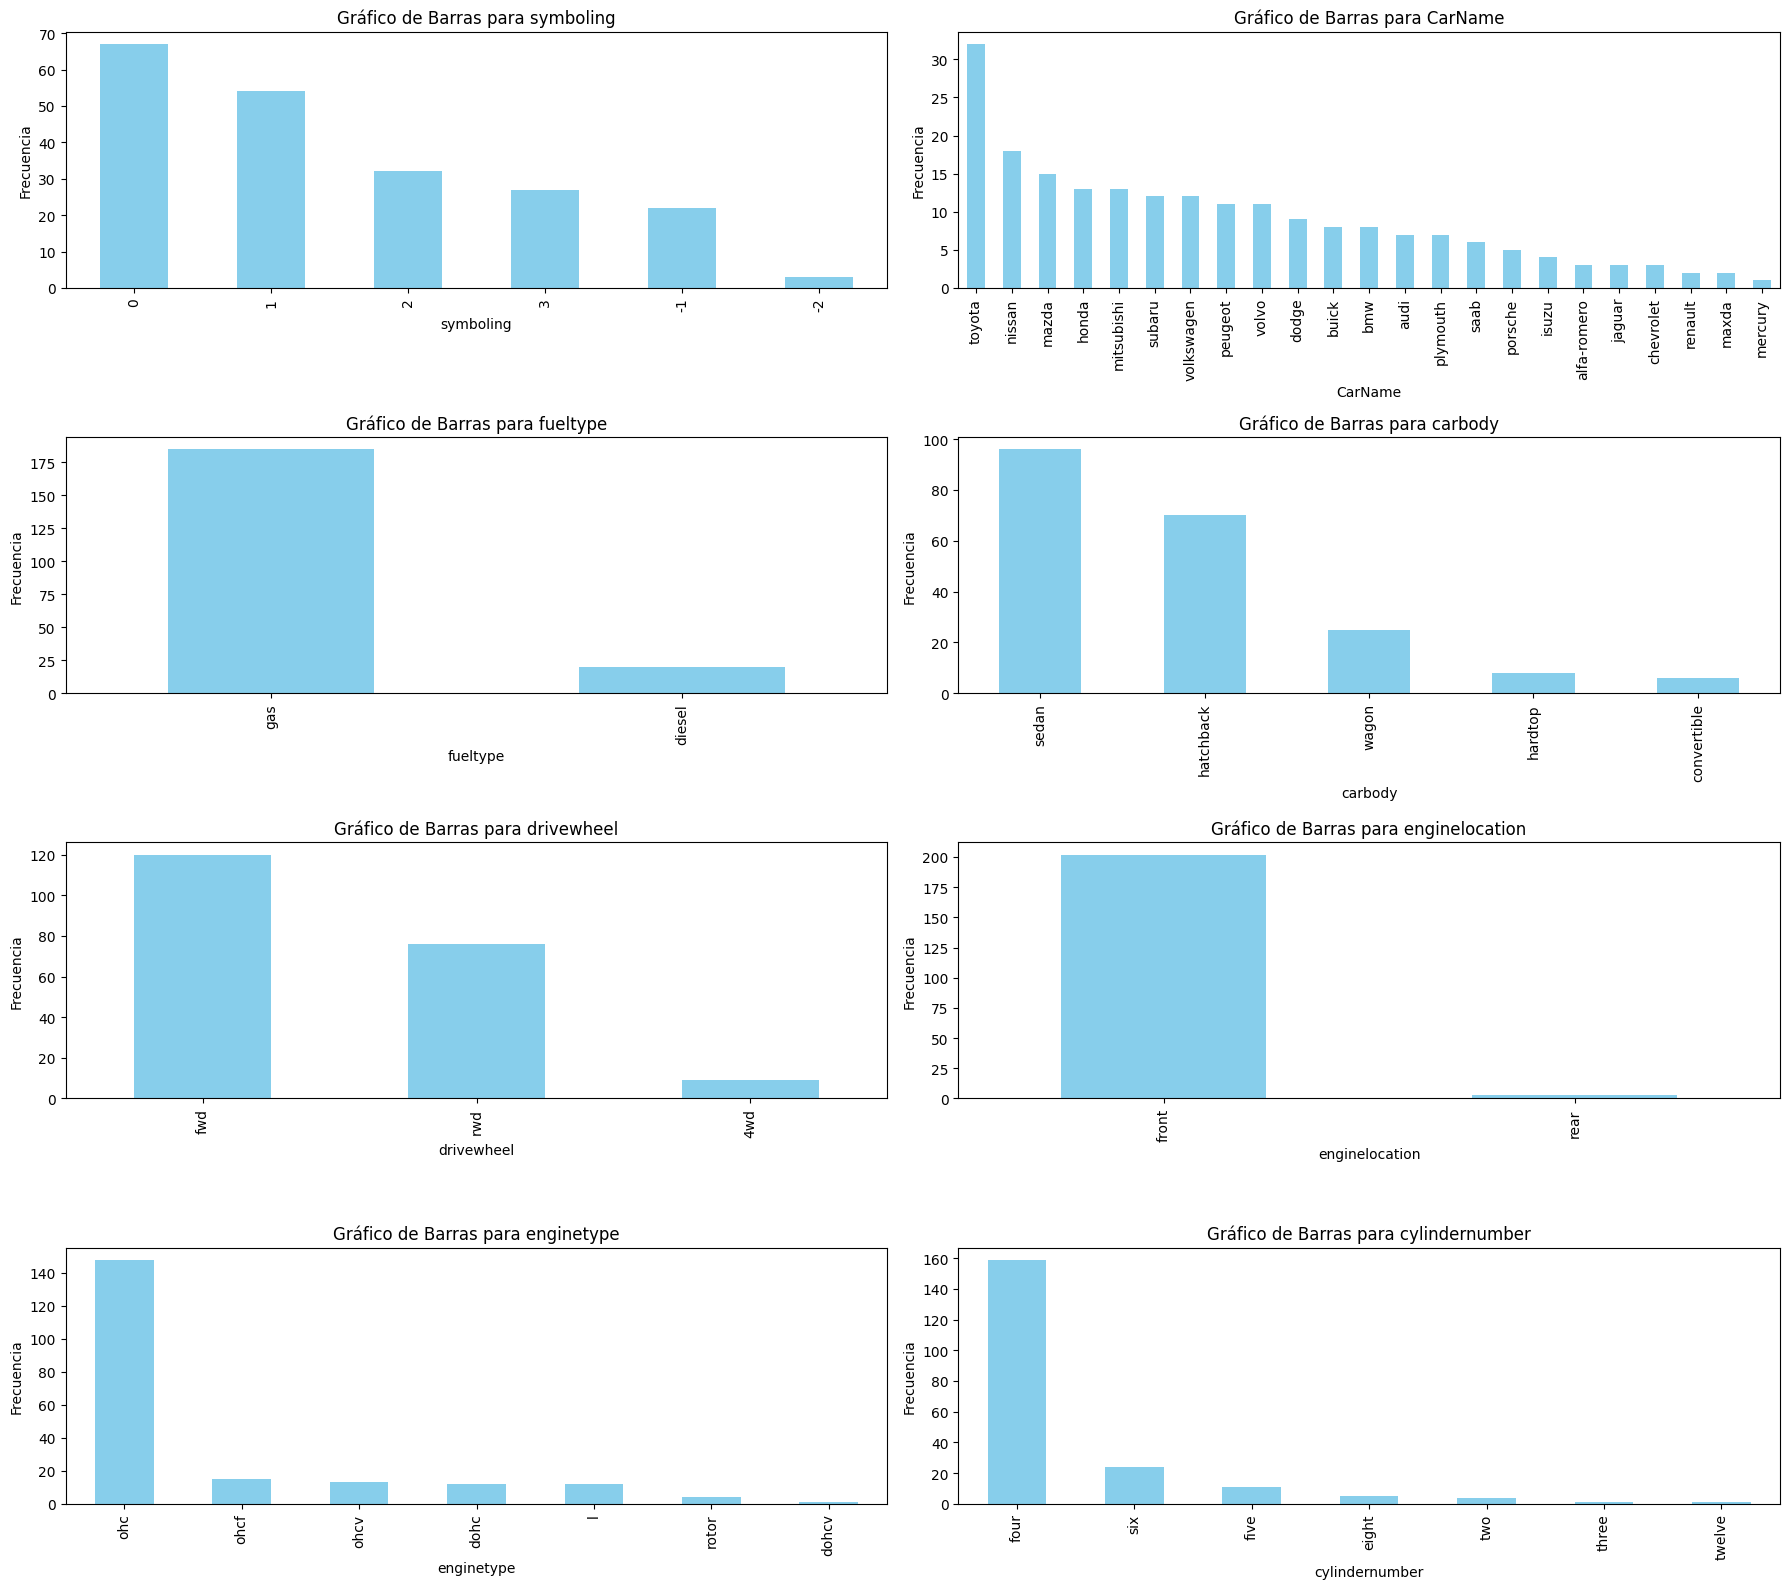

In [513]:
# Calcular el número de filas y columnas necesarias para los subplots
num_filas = len(cual_var) // 2 + len(cual_var) % 2  # División entera + 1 si hay un número impar de variables
num_columnas = 2  # 2 columnas en cada fila

# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 16))

# Asegurar de que cual_var tenga al menos el mismo número de elementos que subplots
cual_var.extend([''] * (num_filas * num_columnas - len(cual_var)))

# Recorrer las variables y crea las gráficas de barras en los subplots
for i, column in enumerate(cual_var):
    fila = i // num_columnas  # Fila en la matriz de subplots
    columna = i % num_columnas  # Columna en la matriz de subplots

    if column:
        data_base[column].value_counts().plot(kind='bar', color='skyblue', ax=axs[fila, columna])
        axs[fila, columna].set_xlabel(column)
        axs[fila, columna].set_ylabel('Frecuencia')
        axs[fila, columna].set_title(f'Gráfico de Barras para {column}')
        axs[fila, columna].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

##### Análisis de colinealidad

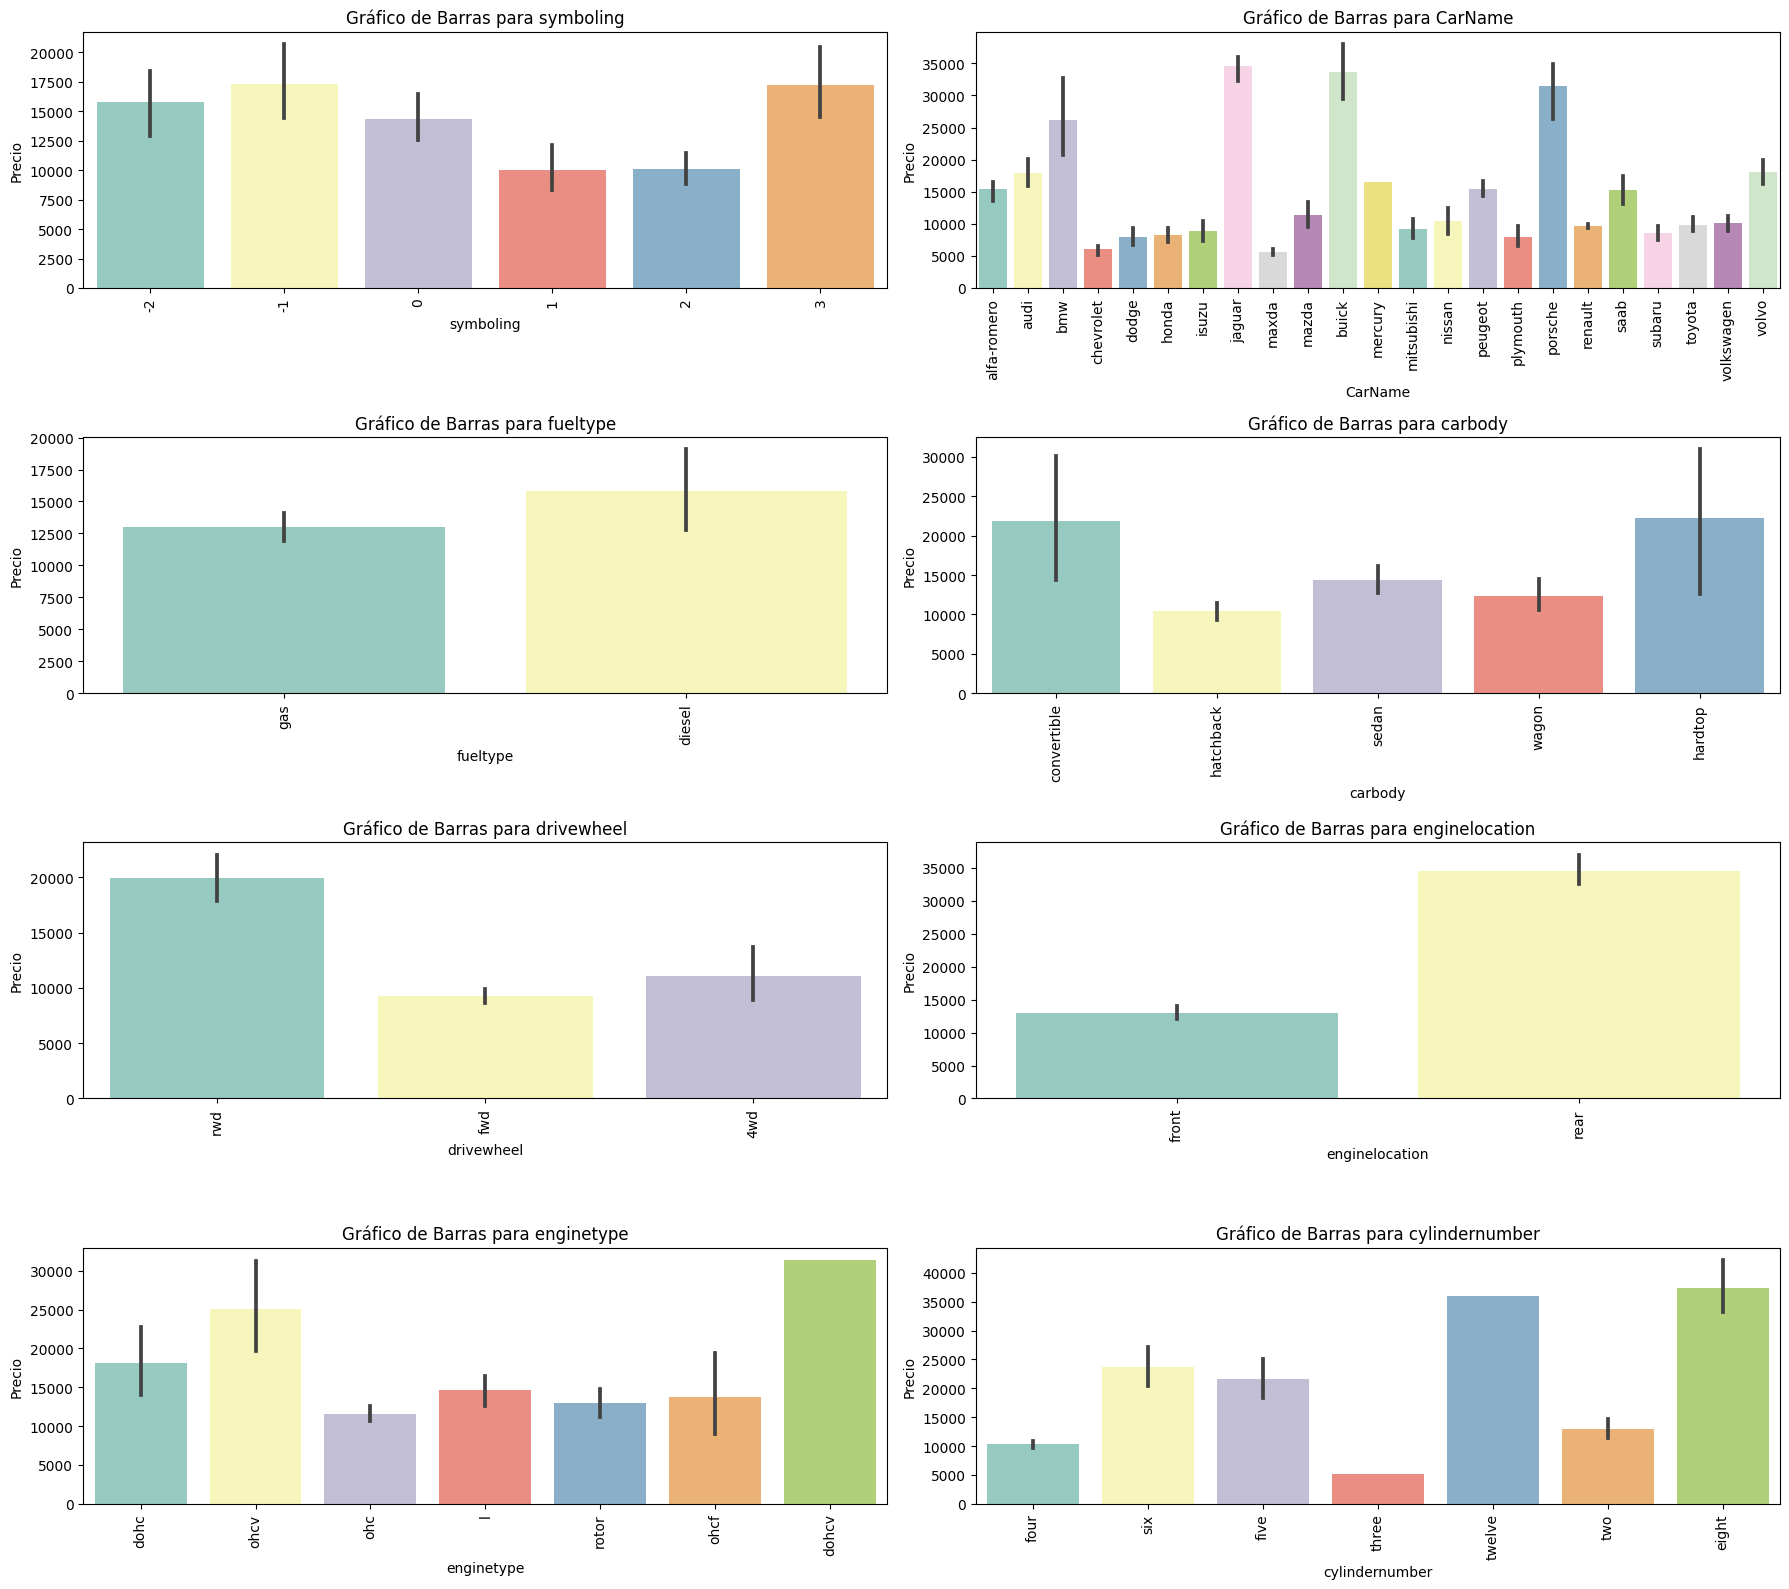

In [514]:
# Calcular el número de filas y columnas necesarias para los subplots
num_filas = len(cual_var) // 2 + len(cual_var) % 2  # División entera + 1 si hay un número impar de variables
num_columnas = 2  # 2 columnas en cada fila

# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 16))

# Asegurar de que cual_var tenga al menos el mismo número de elementos que subplots
cual_var.extend([''] * (num_filas * num_columnas - len(cual_var)))

# Recorrer las variables y crea las gráficas de barras en los subplots
for i, column in enumerate(cual_var):
    fila = i // num_columnas  # Fila en la matriz de subplots
    columna = i % num_columnas  # Columna en la matriz de subplots

    if column:
        sb.barplot(x=column, y=data_base['price'], data=data_base, palette="Set3", ax=axs[fila, columna])
        axs[fila, columna].set_xlabel(column)
        axs[fila, columna].set_ylabel('Precio')
        axs[fila, columna].set_title(f'Gráfico de Barras para {column}')
        axs[fila, columna].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### 3.- Identifica problemas de calidad de datos

#### Valores nulos

In [515]:
# Se verifica que no haya valores nulos
data_base.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Outliers
Desplegamos los valores atípicos por variable cuantitativa

In [516]:
print("--------------------------- OUTLIERS ---------------------------")
for i in df_cuantitativo.columns:
    print('Columna: ', i)

    # Selecciona la columna en la que quieres identificar los outliers
    columna_ = data_base[i]

    # Calcula el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = columna_.quantile(0.25)
    Q3 = columna_.quantile(0.75)

    # Calcula el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Define los límites inferior y superior para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encuentra los outliers en la columna
    outliers = columna_[(columna_ < limite_inferior) | (columna_ > limite_superior)].values

    # Imprime los outliers
    print(outliers, end='\n\n')


--------------------------- OUTLIERS ---------------------------
Columna:  wheelbase
[115.6 115.6 120.9]

Columna:  carlength
[141.1]

Columna:  carwidth
[71.4 71.4 71.4 71.7 71.7 71.7 72.  72.3]

Columna:  carheight
[]

Columna:  curbweight
[]

Columna:  enginesize
[209 209 209 258 258 326 234 234 308 304]

Columna:  stroke
[3.9  4.17 4.17 2.19 2.19 3.9  3.9  2.07 2.36 2.64 2.64 2.64 2.64 2.64
 2.64 2.64 2.64 2.64 2.64 2.64]

Columna:  compressionratio
[ 7.   7.  11.5 22.7 22.  21.5 21.5 21.5 21.5  7.   7.   7.  21.9 21.
 21.  21.  21.  21.   7.   7.  22.5 22.5 22.5 23.  23.  23.  23.  23. ]

Columna:  horsepower
[262 200 207 207 207 288]

Columna:  peakrpm
[6600 6600]

Columna:  citympg
[47 49]

Columna:  highwaympg
[53 54 50]



### 4.- Con base en el análisis selecciona al menos 6 variables que consideres importantes para el análisis de las características de los automóviles que determinan su precio.

Se eligiran 3 variables cuantitativas y 3 variables cualitativas.

De acuerdo con la tabla de correlación proponemos como hipótesis que estas tres variables cuantitativas son parámetros importantes para determinar el precio de los autos.

| Variable | Índice de Correlación |
| ---------- |------------ |
| curbweight | 0.84 |
| enginesize | 0.87 |
| horsepower | 0.81 |

Gracias a las gráficas de barras de las variables cualitativas podemos ver qué tanto afecta el precio, donde se perciben cambios importantes es para: cylindernumber, carname, symboling.


In [517]:
df_ = data_base[['curbweight', 'enginesize', 'horsepower','cylindernumber', 'fueltype','symboling']] 
df_

,curbweight,enginesize,horsepower,cylindernumber,fueltype,symboling
0,2548,130,111,four,gas,3
1,2548,130,111,four,gas,3
2,2823,152,154,six,gas,1
3,2337,109,102,four,gas,2
4,2824,136,115,five,gas,2
...,...,...,...,...,...,...
200,2952,141,114,four,gas,-1
201,3049,141,160,four,gas,-1
202,3012,173,134,six,gas,-1
203,3217,145,106,six,diesel,-1


## Preparación de la base de datos

### Selección del conjunto de datos a utilizar

#### Partición del dataset
Obtención de variables regresoras y variable dependiente

In [518]:
# Se obtienen variables regresoras y variable independiente
X = df_.copy()
y = data_base['price']
print(X.shape)
print(y.shape)

(205, 6)
(205,)


Transformación a variables dummy de las variables categóricas

In [519]:
# Se obtienen las variables dummies para la columna cylindernumber
num_cyl_dummies = pd.get_dummies(X['cylindernumber'], prefix='cylinder')
num_cyl_dummies

,cylinder_eight,cylinder_five,cylinder_four,cylinder_six,cylinder_three,cylinder_twelve,cylinder_two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
200,0,0,1,0,0,0,0
201,0,0,1,0,0,0,0
202,0,0,0,1,0,0,0
203,0,0,0,1,0,0,0


In [520]:
# Se obtienen variables dummies para la columna fueltype
fuel_dummies = pd.get_dummies(X['fueltype'], prefix='fueltype')
fuel_dummies

,fueltype_diesel,fueltype_gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [521]:
# Se agregan variables dummies al nuestras variables regresoras
X = pd.concat([X, num_cyl_dummies, fuel_dummies], axis=1)

# Se eliminan las columnas categoricas
X = X.drop('cylindernumber', axis=1)
X = X.drop('fueltype', axis=1)
X

,curbweight,enginesize,horsepower,symboling,cylinder_eight,cylinder_five,cylinder_four,cylinder_six,cylinder_three,cylinder_twelve,cylinder_two,fueltype_diesel,fueltype_gas
0,2548,130,111,3,0,0,1,0,0,0,0,0,1
1,2548,130,111,3,0,0,1,0,0,0,0,0,1
2,2823,152,154,1,0,0,0,1,0,0,0,0,1
3,2337,109,102,2,0,0,1,0,0,0,0,0,1
4,2824,136,115,2,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,141,114,-1,0,0,1,0,0,0,0,0,1
201,3049,141,160,-1,0,0,1,0,0,0,0,0,1
202,3012,173,134,-1,0,0,0,1,0,0,0,0,1
203,3217,145,106,-1,0,0,0,1,0,0,0,1,0


#### Procesar outliers
Se eliminan los datos atípicos encontrados en las variables cuantitativas, solo se realiza este proceso para estas variables ya que en las varibales cualitativas no se encuentran valores fuera de los rangos (no se encuentran valores nulos).

In [522]:
print("--------------------------- OUTLIERS ---------------------------")
cuant = ['curbweight', 'enginesize', 'horsepower'] 

for column in X[cuant]:
    print("Columna: ", column)
    # Selecciona la columna en la que quieres identificar los outliers
    columna_ = X[column]

    # Calcula el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = columna_.quantile(0.25)
    Q3 = columna_.quantile(0.75)

    # Calcula el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Define los límites inferior y superior para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = columna_[(columna_ < limite_inferior) | (columna_ > limite_superior)].values
    print(outliers)

    # Encuentra los outliers en la columna
    indices =  X[(X[column] < limite_inferior) | (X[column] > limite_superior)].index
    X = X.drop(indices)
    y = y.drop(indices)
    outliers = X[(columna_ < limite_inferior) | (columna_ > limite_superior)].values
    print(outliers)

print("\nTamaño de los Dataframes")
print("Variables dependientes X: ",X.shape)
print("Variables independientes y: ",y.shape)

--------------------------- OUTLIERS ---------------------------
Columna:  curbweight
[]
[]
Columna:  enginesize
[209 209 209 258 258 326 234 234 308 304]
[]
Columna:  horsepower
[200 207 207 207 288]
[]

Tamaño de los Dataframes
Variables dependientes X:  (190, 13)
Variables independientes y:  (190,)


C:\Users\frida\AppData\Local\Temp\ipykernel_14884\2312083802.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X[(columna_ < limite_inferior) | (columna_ > limite_superior)].values


In [535]:
X.head()

,curbweight,enginesize,horsepower,symboling,cylinder_eight,cylinder_five,cylinder_four,cylinder_six,cylinder_three,cylinder_twelve,cylinder_two,fueltype_diesel,fueltype_gas
0,0.143050,0.431717,0.484293,1.784802,0.0,-0.247896,0.441552,-0.29277,-0.072739,0.0,-0.146647,-0.342997,0.342997
1,0.143050,0.431717,0.484293,1.784802,0.0,-0.247896,0.441552,-0.29277,-0.072739,0.0,-0.146647,-0.342997,0.342997
2,0.751562,1.252351,1.953536,0.150525,0.0,-0.247896,-2.264737,3.41565,-0.072739,0.0,-0.146647,-0.342997,0.342997
3,-0.323845,-0.351616,0.176777,0.967664,0.0,-0.247896,0.441552,-0.29277,-0.072739,0.0,-0.146647,-0.342997,0.342997
4,0.753775,0.655526,0.620967,0.967664,0.0,4.033947,-2.264737,-0.29277,-0.072739,0.0,-0.146647,-0.342997,0.342997


### Trasforma los datos en caso de ser necesario

In [523]:
X[['curbweight', 'enginesize', 'horsepower']].corr()

,curbweight,enginesize,horsepower
curbweight,1.000000,0.842026,0.730691
enginesize,0.842026,1.000000,0.747416
horsepower,0.730691,0.747416,1.000000


## Modelación y verificación del modelo

In [524]:
# Se obtiene un pdf con todas nuestras variables juntas
df_est = pd.concat([y, X], axis=1)

# Se estandarizan los datos
scaler = StandardScaler()
df_st = scaler.fit_transform(df_est)
df_st = pd.DataFrame(df_st, columns=df_est.columns)

# Se obtienen variables escaladas
y = df_st.iloc[: , 0]
X = df_st.iloc[:, 1:]

### Regresión Lineal

In [525]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Se obtienen las predicciones con el modelo obtenido
y_pred = modelo.predict(X_test)

# MSE, MAE y R^2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R^2: ', r2)

Mean Squared Error:  0.11614469274200179
Mean Absolute Error:  0.2573391181607133
R^2:  0.8251404820163337


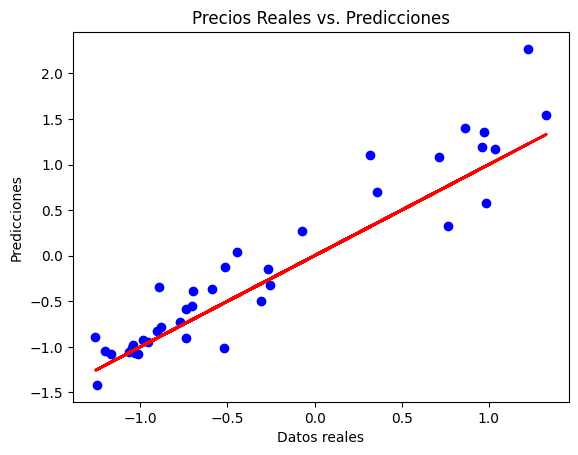

In [526]:
# Gráfica de dispersión con valores reales y los valores que se predijeron
plt.scatter(y_test, y_pred, color='blue', label='Datos de entrenamiento')

# Dibujar la línea de regresión
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regresión Lineal')

# Etiquetas y título del gráfico
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.title(f'Precios Reales vs. Predicciones')

# Mostrar el gráfico
plt.show()

### Mínimos cuadrados ordinarios - OLS

In [527]:
# Se obtiene el modelo
model_ols = smf.ols(formula='price~curbweight+enginesize+horsepower+symboling+cylinder_eight+cylinder_five+cylinder_four+cylinder_six+cylinder_three+cylinder_twelve+fueltype_diesel', data=df_st)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     84.53
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           7.14e-60
Time:                        21:39:42   Log-Likelihood:                -112.49
No. Observations:                 190   AIC:                             245.0
Df Residuals:                     180   BIC:                             277.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.245e-17      0.033   1.

c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### Modelo de Gradiente descendiente

In [528]:
# Se crea y se entrena el modelo
model_SGD = SGDRegressor(max_iter=10000, tol=1e-3)
model_SGD.fit(X_train,y_train)

# Se realizan las predicciones con el modelo obtenido
y_SGD_pred = model_SGD.predict(X_test)

# MSE, MAE y R^2
mse = mean_squared_error(y_test, y_SGD_pred)
mae = mean_absolute_error(y_test, y_SGD_pred)
r2 = r2_score(y_test, y_SGD_pred)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R^2: ', r2)

Mean Squared Error:  0.1181142693810935
Mean Absolute Error:  0.26405576593640917
R^2:  0.8221752219290004


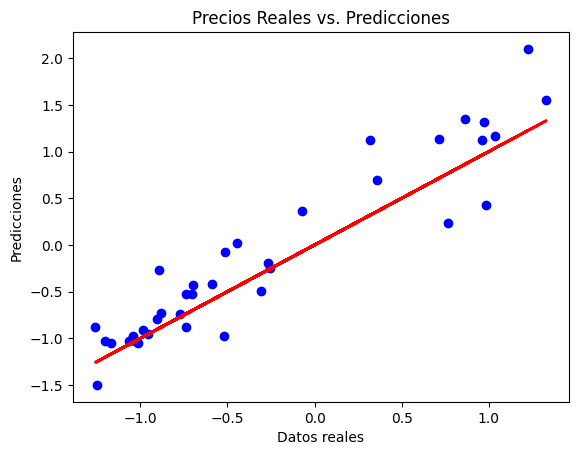

In [529]:
# Gráfica de dispersión con valores reales y los valores que se predijeron
plt.scatter(y_test, y_SGD_pred, color='blue', label='Datos de entrenamiento')

# Dibujar la línea de regresión
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regresión Lineal')

# Etiquetas y título del gráfico
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.title(f'Precios Reales vs. Predicciones')

# Mostrar el gráfico
plt.show()

### Prueba de hipótesis

In [532]:
# Se obtiene el modelo
model_ols = smf.ols(formula='price~curbweight+enginesize+horsepower+symboling+cylinder_eight+cylinder_five+cylinder_four+cylinder_six+cylinder_twelve+fueltype_diesel', data=df_st)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     84.53
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           7.14e-60
Time:                        21:42:50   Log-Likelihood:                -112.49
No. Observations:                 190   AIC:                             245.0
Df Residuals:                     180   BIC:                             277.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.245e-17      0.033   1.

c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [533]:
# Se obtiene el modelo
model_ols = smf.ols(formula='price~curbweight+enginesize+horsepower+symboling+cylinder_eight+cylinder_five+cylinder_four+cylinder_twelve+fueltype_diesel', data=df_st)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     95.59
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           7.25e-61
Time:                        21:43:39   Log-Likelihood:                -112.52
No. Observations:                 190   AIC:                             243.0
Df Residuals:                     181   BIC:                             272.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.245e-17      0.033   1.

c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [534]:
# Se obtiene el modelo
model_ols = smf.ols(formula='price~curbweight+enginesize+horsepower+symboling+cylinder_eight+cylinder_five+cylinder_four+cylinder_twelve+fueltype_diesel', data=df_st)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           7.07e-62
Time:                        21:44:10   Log-Likelihood:                -112.58
No. Observations:                 190   AIC:                             241.2
Df Residuals:                     182   BIC:                             267.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.245e-17      0.032   1.

c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [530]:
# Se obtiene el modelo
model_ols = smf.ols(formula='price~curbweight+horsepower', data=df_st)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     283.6
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           2.37e-57
Time:                        21:39:42   Log-Likelihood:                -137.12
No. Observations:                 190   AIC:                             280.2
Df Residuals:                     187   BIC:                             290.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.204e-17      0.036   1.43e-15      1.0

In [531]:
# Se obtiene el modelo
model_ols = smf.ols(formula='price~symboling+cylinder_eight+cylinder_five+cylinder_four+cylinder_six+cylinder_three+cylinder_twelve+fueltype_diesel', data=df_st)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     24.98
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.52e-21
Time:                        21:39:42   Log-Likelihood:                -212.77
No. Observations:                 190   AIC:                             439.5
Df Residuals:                     183   BIC:                             462.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.245e-17      0.055   1.

c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
